In [1]:
import pandas as pd
import numpy as np

In [3]:
df = pd.read_excel('./KarenChen_Analyst Candidate Assessment.xlsx',sheet_name = 'Data')

## EDA

### Descriptive Analysis

In [4]:
df.head(5)

,user_id,user_created_timestamp,user_conversion_dma,user_use_case_type,user_account_type,user_attribution_source,user_attribution_channel,user_device_id,host_published_listing_count,host_current_published_listing_count,host_first_listing_published_timestamp,host_average_listing_quality_score,host_average_published_listing_quality_score,host_listing_type,renter_reservation_count,renter_successful_reservation_count,Unnamed: 16
0,148328,##########,San Francisco-Oakland-San Jose,renter,residential,Paid,Google,NaN,0,0,NaN,NaN,NaN,Both,2,2,NaN
1,243925,##########,Houston,renter,residential,Organic,NaN,NaN,0,0,NaN,NaN,NaN,Both,1,1,NaN
2,190270,##########,unknown (no conversion events),renter,residential,Organic,NaN,NaN,0,0,NaN,NaN,NaN,Both,0,0,NaN
3,29676,##########,Dallas-Fort Worth,host,residential,Direct,NaN,NaN,1,0,##########,65.75,NaN,Both,0,0,NaN
4,122262,##########,unknown (no conversion events),renter,residential,Direct,NaN,NaN,0,0,NaN,NaN,NaN,Both,0,0,NaN


In [5]:
df.drop(['Unnamed: 16'],axis = 1, inplace= True)

In [6]:
df.shape

(10000, 16)

In [7]:
# Dropping the duplicate rows:
df.drop_duplicates().shape

(10000, 16)

In [48]:
for col in df.columns[~df.columns.isin(['user_id', 'user_created_timestamp','user_conversion_dma',
                                        'user_device_id','host_first_listing_published_timestamp',
                                        'host_average_listing_quality_score','host_average_published_listing_quality_score'])]:
    print(col)
    print(df[col].unique())
    print()

user_use_case_type
['renter' 'host' 'unknown' 'hybrid']

user_account_type
['residential' 'commercial' 'facility']

user_attribution_source
['Paid' 'Organic' 'Direct' 'Social' 'Referral' 'Bizdev']

user_attribution_channel
['Google' 'nan' 'HireClix' 'PaidEmail' 'Facebook' 'Craigslist' 'rakuten'
 'Apple Search Ads' 'Affiliates' 'Instagram' 'jobget' 'turo' 'Android'
 'iAd' 'blog' 'FB Lead Gen' 'Organic_Social' 'Bing' 'fond'
 'Appcast Xcelerate' 'iosapp' 'simplifi' 'customer.io' 'braze' 'Paid'
 'sfmc' 'cpc' 'Snapchat' 'SmartLinks' 'ZipRecruiter FE - CPC']

host_published_listing_count
[   0    1    2    3    4    5   19    6   10    9   11   12    7   20
  122    8   59   15  125   53   16   17   18   13   35   23 1031   22
  502   66]

host_current_published_listing_count
[  0   2   1   3   4   5   9   6  11  20  24  12   7  54  10 125  50  14
  13   8  18  16 500  63  22]

host_listing_type
['Both']

renter_reservation_count
[  2   1   0   3   8   9   4   7   6  11   5  13  12 527  20  

In [8]:
df.isnull().sum()

user_id                                            0
user_created_timestamp                             0
user_conversion_dma                                2
user_use_case_type                                 0
user_account_type                                  0
user_attribution_source                            0
user_attribution_channel                        4252
user_device_id                                  6880
host_published_listing_count                       0
host_current_published_listing_count               0
host_first_listing_published_timestamp          8339
host_average_listing_quality_score              6630
host_average_published_listing_quality_score    9007
host_listing_type                                  0
renter_reservation_count                           0
renter_successful_reservation_count                0
dtype: int64

In [9]:
df[(df.user_use_case_type == 'host')&(pd.isna(df.host_average_published_listing_quality_score))]

,user_id,user_created_timestamp,user_conversion_dma,user_use_case_type,user_account_type,user_attribution_source,user_attribution_channel,user_device_id,host_published_listing_count,host_current_published_listing_count,host_first_listing_published_timestamp,host_average_listing_quality_score,host_average_published_listing_quality_score,host_listing_type,renter_reservation_count,renter_successful_reservation_count
3,29676,##########,Dallas-Fort Worth,host,residential,Direct,NaN,NaN,1,0,##########,65.75,NaN,Both,0,0
5,238983,##########,Raleigh-Durham,host,residential,Paid,HireClix,NaN,1,0,##########,52.50,NaN,Both,0,0
8,197568,##########,Lexington,host,residential,Paid,PaidEmail,NaN,0,0,NaN,18.75,NaN,Both,0,0
12,180572,##########,West Palm Beach-Fort Pierce,host,residential,Paid,Facebook,NaN,0,0,NaN,0.00,NaN,Both,0,0
14,31307,##########,unknown (no conversion events),host,residential,Direct,NaN,NaN,0,0,NaN,NaN,NaN,Both,0,0
16,136707,##########,unknown (no conversion events),host,residential,Direct,NaN,NaN,0,0,NaN,NaN,NaN,Both,0,0
17,31025,##########,unknown (no conversion events),host,residential,Direct,NaN,NaN,0,0,NaN,NaN,NaN,Both,0,0
18,106638,##########,unknown (no conversion events),host,residential,Paid,HireClix,NaN,0,0,NaN,NaN,NaN,Both,0,0
20,176727,##########,Boston,host,residential,Paid,rakuten,NaN,0,0,NaN,0.00,NaN,Both,0,0
23,196605,##########,Tulsa,host,residential,Paid,HireClix,NaN,0,0,NaN,12.50,NaN,Both,0,0


host_average_listing_quality_score is missing since host_published_listing_count = 0

host_first_listing_published_timestamp is missing since host_published_listing_count = 0


In [10]:
len(df.user_id.unique())

10000

In [11]:
df['user_attribution_channel'] = df['user_attribution_channel'].fillna('nan')
df['user_device_id'] = df['user_device_id'].fillna('nan')
df['host_average_listing_quality_score'] = df['host_average_listing_quality_score'].fillna(0)
df['host_first_listing_published_timestamp'] = df['host_first_listing_published_timestamp'].fillna('nan')
df['user_conversion_dma'] = df['user_conversion_dma'].fillna('nan')
df['host_average_published_listing_quality_score'] = df['host_average_published_listing_quality_score'].fillna(0)

In [12]:
df.isnull().sum()

user_id                                         0
user_created_timestamp                          0
user_conversion_dma                             0
user_use_case_type                              0
user_account_type                               0
user_attribution_source                         0
user_attribution_channel                        0
user_device_id                                  0
host_published_listing_count                    0
host_current_published_listing_count            0
host_first_listing_published_timestamp          0
host_average_listing_quality_score              0
host_average_published_listing_quality_score    0
host_listing_type                               0
renter_reservation_count                        0
renter_successful_reservation_count             0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
user_id                                         10000 non-null int64
user_created_timestamp                          10000 non-null object
user_conversion_dma                             10000 non-null object
user_use_case_type                              10000 non-null object
user_account_type                               10000 non-null object
user_attribution_source                         10000 non-null object
user_attribution_channel                        10000 non-null object
user_device_id                                  10000 non-null object
host_published_listing_count                    10000 non-null int64
host_current_published_listing_count            10000 non-null int64
host_first_listing_published_timestamp          10000 non-null object
host_average_listing_quality_score              10000 non-null float64
host_average_published_listing_quality_score    10000 

In [14]:
df.describe()

,user_id,host_published_listing_count,host_current_published_listing_count,host_average_listing_quality_score,host_average_published_listing_quality_score,renter_reservation_count,renter_successful_reservation_count
count,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,137192.908700,0.473500,0.243600,10.475939,5.102113,0.225900,0.225900
std,63777.079208,11.690901,5.305966,20.422808,16.629706,5.323411,5.323411
min,27333.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,81609.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,137439.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,192313.500000,0.000000,0.000000,6.250000,0.000000,0.000000,0.000000
max,248501.000000,1031.000000,500.000000,95.000000,93.750000,527.000000,527.000000


### Outliers

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

def check_outliers(df,col):
    sns.boxplot(x=df[col])
    plt.show()
    
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    # Q3 = df[df.columns[~(df.columns == 'user_id')]].quantile(0.75)
    IQR = Q3 - Q1
    
    outliers = df[((df[col] < (Q1 - 1.5 * IQR)) |(df[col] > (Q3 + 1.5 * IQR)))]

    ax = sns.distplot(df[col], hist=True)
    return outliers , IQR

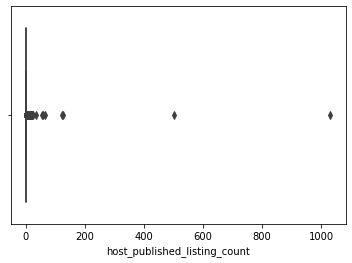

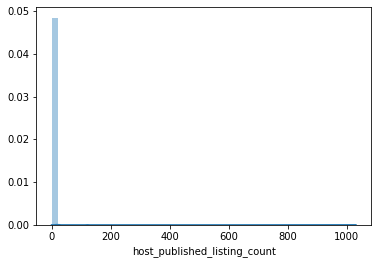

In [16]:
outliers, IQR = check_outliers(df,'host_published_listing_count')

In [18]:
df[df.host_published_listing_count > 100]
# outlier for 45956 in host_published_listing_count

,user_id,user_created_timestamp,user_conversion_dma,user_use_case_type,user_account_type,user_attribution_source,user_attribution_channel,user_device_id,host_published_listing_count,host_current_published_listing_count,host_first_listing_published_timestamp,host_average_listing_quality_score,host_average_published_listing_quality_score,host_listing_type,renter_reservation_count,renter_successful_reservation_count
2604,161888,##########,Baltimore,host,commercial,Organic,nan,nan,122,24,##########,80.87,66.46,Both,0,0
4997,149777,##########,Greenville-Spartanburg-Asheville,host,commercial,Bizdev,Paid,nan,125,125,##########,69.60,69.60,Both,0,0
8576,45956,##########,Baltimore,host,facility,Bizdev,nan,nan,1031,0,##########,69.23,0.00,Both,0,0
9418,167419,##########,Greenville-Spartanburg-Asheville,host,commercial,Bizdev,cpc,nan,502,500,##########,72.98,72.97,Both,0,0


In [19]:
df[df.user_account_type == 'facility']

,user_id,user_created_timestamp,user_conversion_dma,user_use_case_type,user_account_type,user_attribution_source,user_attribution_channel,user_device_id,host_published_listing_count,host_current_published_listing_count,host_first_listing_published_timestamp,host_average_listing_quality_score,host_average_published_listing_quality_score,host_listing_type,renter_reservation_count,renter_successful_reservation_count
4587,52455,##########,Knoxville,host,facility,Direct,nan,nan,0,0,nan,0.00,0.0,Both,0,0
8576,45956,##########,Baltimore,host,facility,Bizdev,nan,nan,1031,0,##########,69.23,0.0,Both,0,0


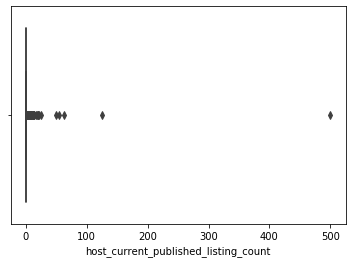

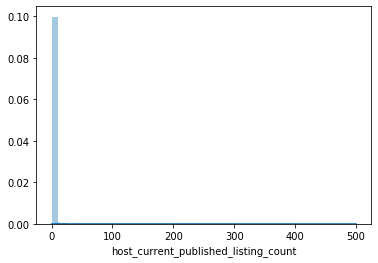

In [20]:
outliers, IQR = check_outliers(df,'host_current_published_listing_count')

In [21]:
df[df.host_current_published_listing_count > 100]

,user_id,user_created_timestamp,user_conversion_dma,user_use_case_type,user_account_type,user_attribution_source,user_attribution_channel,user_device_id,host_published_listing_count,host_current_published_listing_count,host_first_listing_published_timestamp,host_average_listing_quality_score,host_average_published_listing_quality_score,host_listing_type,renter_reservation_count,renter_successful_reservation_count
4997,149777,##########,Greenville-Spartanburg-Asheville,host,commercial,Bizdev,Paid,nan,125,125,##########,69.60,69.60,Both,0,0
9418,167419,##########,Greenville-Spartanburg-Asheville,host,commercial,Bizdev,cpc,nan,502,500,##########,72.98,72.97,Both,0,0


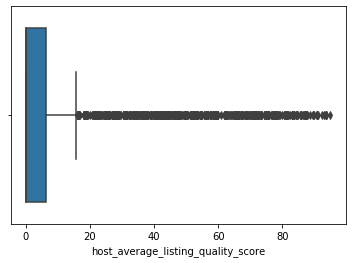

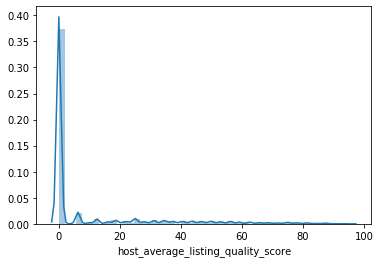

In [22]:
outliers, IQR = check_outliers(df,'host_average_listing_quality_score')

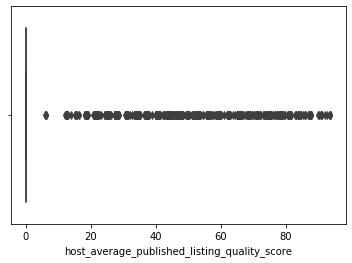

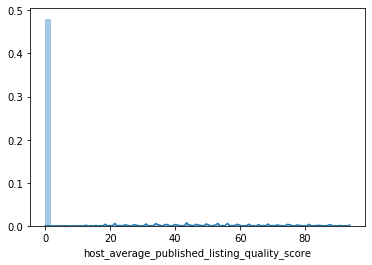

In [23]:
outliers, IQR = check_outliers(df,'host_average_published_listing_quality_score')

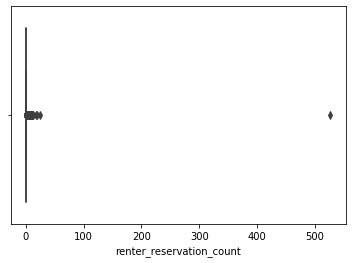

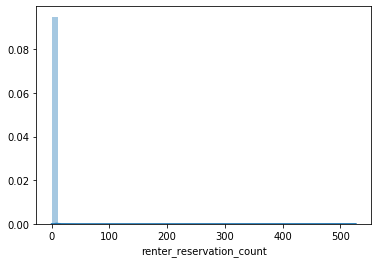

In [24]:
outliers, IQR = check_outliers(df,'renter_reservation_count')

In [25]:
outliers[outliers.renter_reservation_count > 500]

,user_id,user_created_timestamp,user_conversion_dma,user_use_case_type,user_account_type,user_attribution_source,user_attribution_channel,user_device_id,host_published_listing_count,host_current_published_listing_count,host_first_listing_published_timestamp,host_average_listing_quality_score,host_average_published_listing_quality_score,host_listing_type,renter_reservation_count,renter_successful_reservation_count
7447,125182,##########,Rockford,renter,residential,Direct,nan,nan,0,0,nan,0.0,0.0,Both,527,527


### Correlation

In [28]:
df2 = df[df.user_conversion_dma != 'unknown (no conversion events)']

In [29]:
df2.head()

,user_id,user_created_timestamp,user_conversion_dma,user_use_case_type,user_account_type,user_attribution_source,user_attribution_channel,user_device_id,host_published_listing_count,host_current_published_listing_count,host_first_listing_published_timestamp,host_average_listing_quality_score,host_average_published_listing_quality_score,host_listing_type,renter_reservation_count,renter_successful_reservation_count
0,148328,##########,San Francisco-Oakland-San Jose,renter,residential,Paid,Google,nan,0,0,nan,0.00,0.0,Both,2,2
1,243925,##########,Houston,renter,residential,Organic,nan,nan,0,0,nan,0.00,0.0,Both,1,1
3,29676,##########,Dallas-Fort Worth,host,residential,Direct,nan,nan,1,0,##########,65.75,0.0,Both,0,0
5,238983,##########,Raleigh-Durham,host,residential,Paid,HireClix,nan,1,0,##########,52.50,0.0,Both,0,0
8,197568,##########,Lexington,host,residential,Paid,PaidEmail,nan,0,0,nan,18.75,0.0,Both,0,0


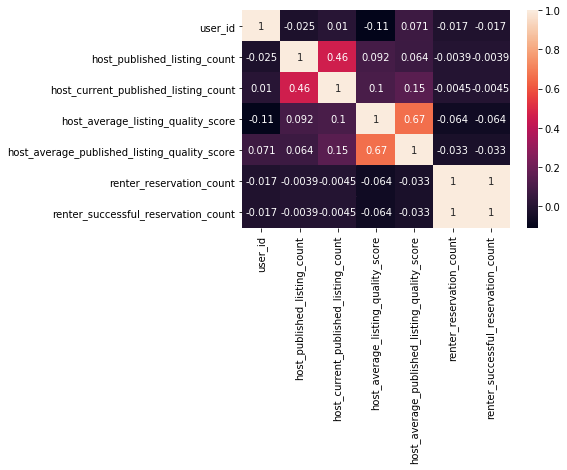

In [30]:
correlation_matrix = df2.corr()
sns.heatmap(correlation_matrix, annot=True)
plt.show()

In [31]:
import scipy.stats as ss
import pandas as pd
import numpy as np
def cramers_corrected_stat(x,y):

    """ calculate Cramers V statistic for categorial-categorial association.
        uses correction from Bergsma and Wicher, 
        Journal of the Korean Statistical Society 42 (2013): 323-328
    """
    result=-1
    if len(x.value_counts())==1 :
        print("First variable is constant")
    elif len(y.value_counts())==1:
        print("Second variable is constant")
    else:   
        conf_matrix=pd.crosstab(x, y)

        if conf_matrix.shape[0]==2:
            correct=False
        else:
            correct=True

        chi2 = ss.chi2_contingency(conf_matrix, correction=correct)[0]

        n = sum(conf_matrix.sum())
        phi2 = chi2/n
        r,k = conf_matrix.shape
        phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))    
        rcorr = r - ((r-1)**2)/(n-1)
        kcorr = k - ((k-1)**2)/(n-1)
        result=np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))
    return round(result,6)

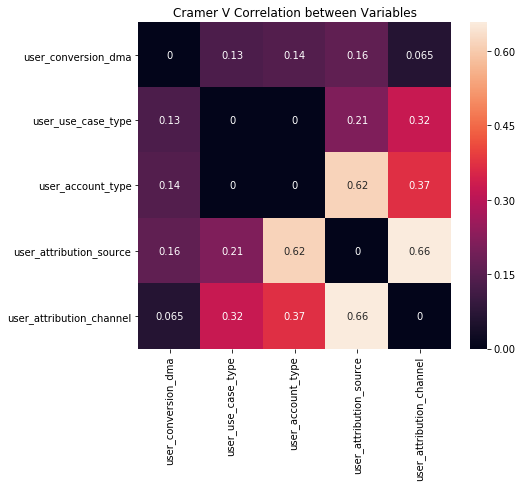

In [32]:
import itertools
cols = ["user_conversion_dma", "user_use_case_type", "user_account_type","user_attribution_source","user_attribution_channel"]
corrM = np.zeros((len(cols),len(cols)))
# there's probably a nice pandas way to do this
for col1, col2 in itertools.combinations(cols, 2):
    idx1, idx2 = cols.index(col1), cols.index(col2)
    corrM[idx1, idx2] = cramers_corrected_stat(df2[col1], df2[col2])
    corrM[idx2, idx1] = corrM[idx1, idx2]

corr = pd.DataFrame(corrM, index=cols, columns=cols)
fig, ax = plt.subplots(figsize=(7, 6))
ax = sns.heatmap(corr, annot=True, ax=ax); ax.set_title("Cramer V Correlation between Variables");

In [36]:
pd.crosstab(df2['user_attribution_source'],df2['user_account_type'])

user_account_type,commercial,facility,residential
user_attribution_source,,,
Bizdev,11,1,0
Direct,1,1,1229
Organic,1,0,375
Paid,1,0,2422
Referral,0,0,11
Social,0,0,22


### Groupings

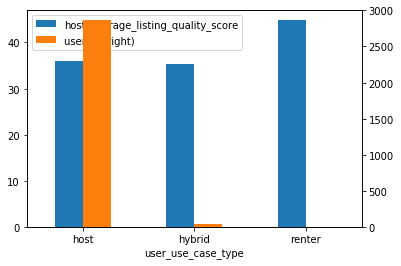

In [42]:
dfg = df[df.host_average_listing_quality_score > 0]
dfg = dfg.groupby('user_use_case_type').agg({'host_average_listing_quality_score':'mean',
                                  'user_id':'count'})
# dfg.plot(kind='bar')
_ = dfg.plot( kind= 'bar' , secondary_y= 'user_id' , rot= 0 )
plt.show()

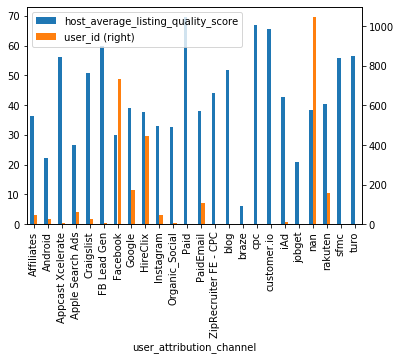

In [43]:
dfg = df[df.host_average_listing_quality_score > 0]
dfg = dfg.groupby('user_attribution_channel').agg({'host_average_listing_quality_score':'mean',
                                  'user_id':'count'})
# dfg.plot(kind='bar')
_ = dfg.plot( kind= 'bar' , secondary_y= 'user_id' , rot= 90 )
plt.show()

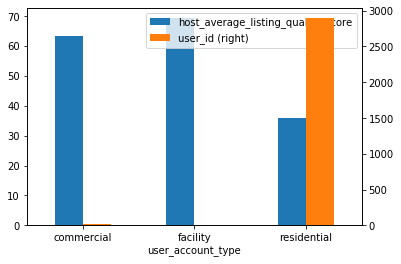

In [44]:
dfg = df[df.host_average_listing_quality_score > 0]
dfg = dfg.groupby('user_account_type').agg({'host_average_listing_quality_score':'mean',
                                  'user_id':'count'})
# dfg.plot(kind='bar')
_ = dfg.plot( kind= 'bar' , secondary_y= 'user_id' , rot= 0 )
plt.show()

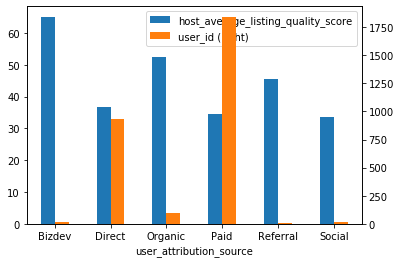

In [45]:
dfg = df[df.host_average_listing_quality_score > 0]
dfg = dfg.groupby('user_attribution_source').agg({'host_average_listing_quality_score':'mean',
                                  'user_id':'count'})
# dfg.plot(kind='bar')
_ = dfg.plot( kind= 'bar' , secondary_y= 'user_id' , rot= 360 )
plt.show()